# Response Measurements

In [1]:
import sys

sys.path.append("../")

In [2]:
import os
from epics import caget, caput

from settings import prod as settings
from src.scan import scan_response_measurements
from src.scan.decorators import response_measurements, add_noise
from src.scan.utils import plot_meters_data, plot_motors_data, plot_response_matrix, clear_output
from src.core import config as cfg

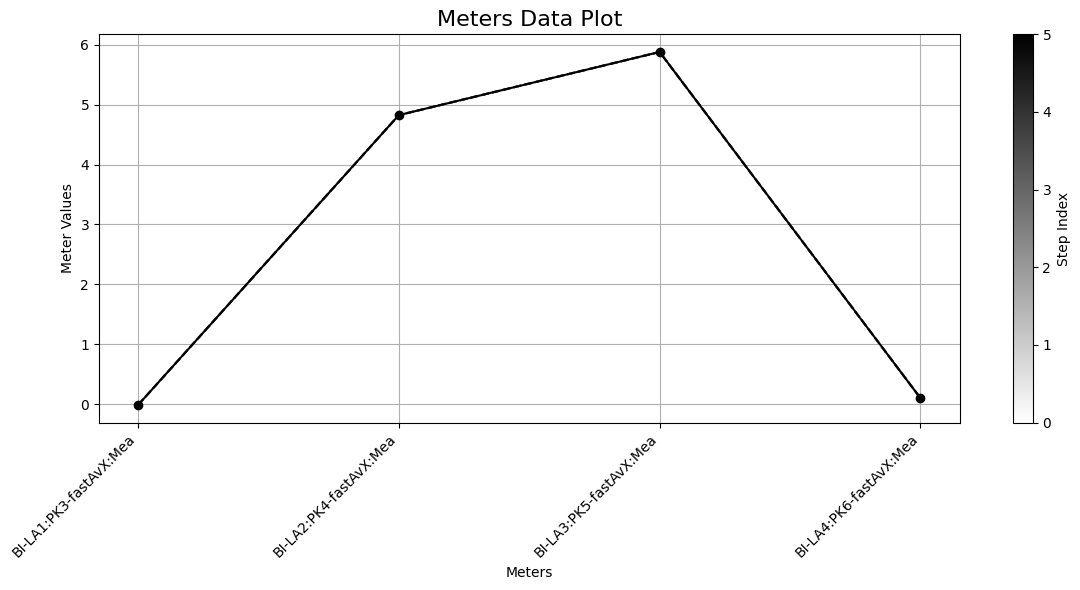

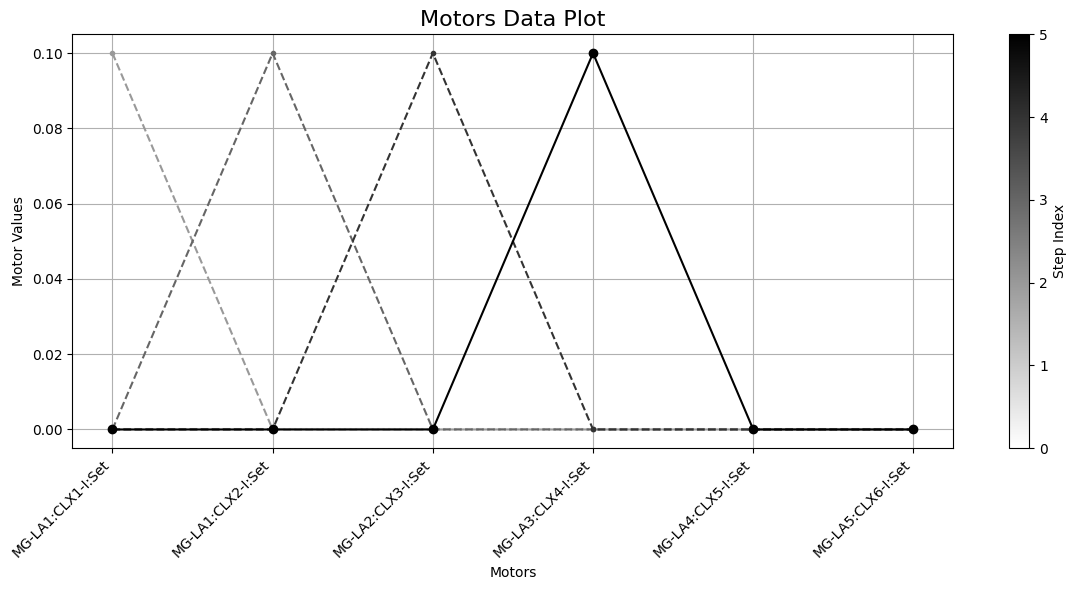

Set motor values:   0%|          | 0/6 [00:00<?, ?it/s]

Collect data:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [3]:
data_scan = scan_response_measurements(
    meters=settings.HORIZONTAL_MONITORS, 
    motors=[[name, [caget(name), caget(name)+settings.HORIZONTAL_KICK]] for name, _ in settings.HORIZONTAL_CORRECTORS], 
    get_func=caget, 
    put_func=caput, 
    sample_size=settings.SAMPLE_SIZE,
    verify_motor=settings.VERIFY_MOTOR,
    max_retries=settings.MAX_TRIES,
    delay=settings.DELAY,
    tolerance=settings.TOLERANCE,
    save=settings.SAVE_SCAN,
    dirname=settings.DIRNAME_DATA,
    callback=[clear_output, plot_meters_data, plot_motors_data, plot_response_matrix], 
    save_original_motor_values=settings.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=settings.PARALLEL,
)

In [ ]:
data_scan